In [35]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


In [23]:
# Asegúrate de tener la ruta correcta y el nombre del archivo
ruta_archivo = 'C:/Users/yourk/Documents/8QT/AI/loan_data_ANN.xlsx'

# Cargar el archivo de Excel en un DataFrame
df = pd.read_excel(ruta_archivo)

# Mostrar los nombres de las columnas
print("Nombres de las columnas en el DataFrame:")
print(df.columns.tolist())

# Dividir los datos en entrenamiento y prueba
datos_entrenamiento = df.iloc[599:1200]  # Filas del 600 al 1200 para entrenamiento
datos_prueba = pd.concat([df.iloc[:599], df.iloc[1200:]])  # El resto para pruebas

Nombres de las columnas en el DataFrame:
['credit.policy', 'installment', 'fully.paid']


In [24]:
features = df[['credit.policy', 'installment', 'fully.paid']]  # Añadiendo 'fully.paid'
labels = df['installment']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Continúa con la normalización de los datos como antes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
# Configuración del perceptrón simple
model = Sequential([
    Dense(1, input_shape=(X_train.shape[1],))  # Única capa de salida sin función de activación explícita para regresión
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Configuración de Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.01,
    patience=10,
    verbose=1,
    restore_best_weights=True
)



C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:

# Entrenamiento del modelo con Early Stopping
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=10,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=False
)


Epoch 36: early stopping
Restoring model weights from the end of the best epoch: 26.


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 7.9015e-04 - mean_absolute_error: 0.0208
Mean Absolute Error: 0.020798608660697937


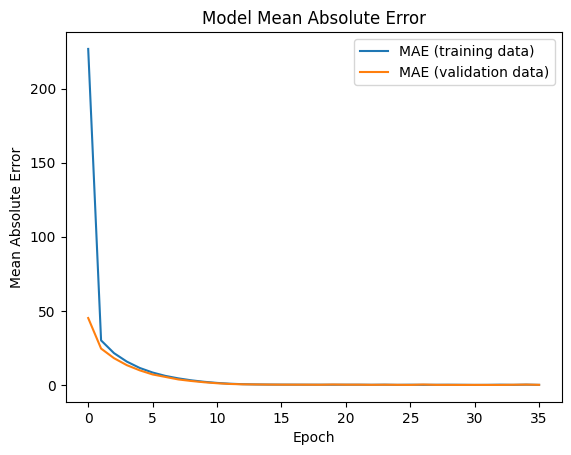

In [28]:
loss, mean_absolute_error = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mean_absolute_error}")
plt.plot(history.history['mean_absolute_error'], label='MAE (training data)')
plt.plot(history.history['val_mean_absolute_error'], label='MAE (validation data)')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()



In [29]:
# Realizar predicciones
predicted_installments = model.predict(X_test)

# Si tus predicciones tienen una dimensión extra debido a que model.predict retorna un array de arrays,
# podrías necesitar aplanarlas utilizando flatten()
predicted_installments = predicted_installments.flatten()
import pandas as pd

# Crear un DataFrame para visualizar las comparaciones
comparison_df = pd.DataFrame({
    'Real Installment': y_test,
    'Predicted Installment': predicted_installments
})

# Opcional: calcular la diferencia entre valores reales y predichos
comparison_df['Difference'] = comparison_df['Real Installment'] - comparison_df['Predicted Installment']

# Mostrar las primeras filas del DataFrame
print(comparison_df.head())


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
      Real Installment  Predicted Installment  Difference
8558            453.52             453.548096   -0.028096
4629            533.46             533.464783   -0.004783
1383            197.75             197.794052   -0.044052
8142            106.16             106.204155   -0.044155
1768            159.92             159.925980   -0.005980


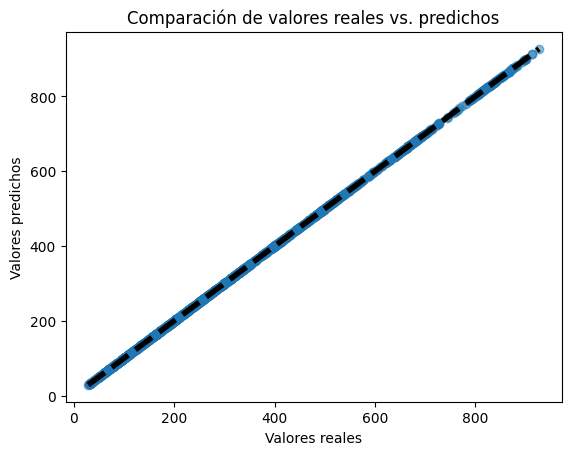

In [34]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de valores reales vs. predichos
plt.scatter(y_test, predicted_installments, alpha=0.5)
plt.title('Comparación de valores reales vs. predichos')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Línea ideal
plt.show()




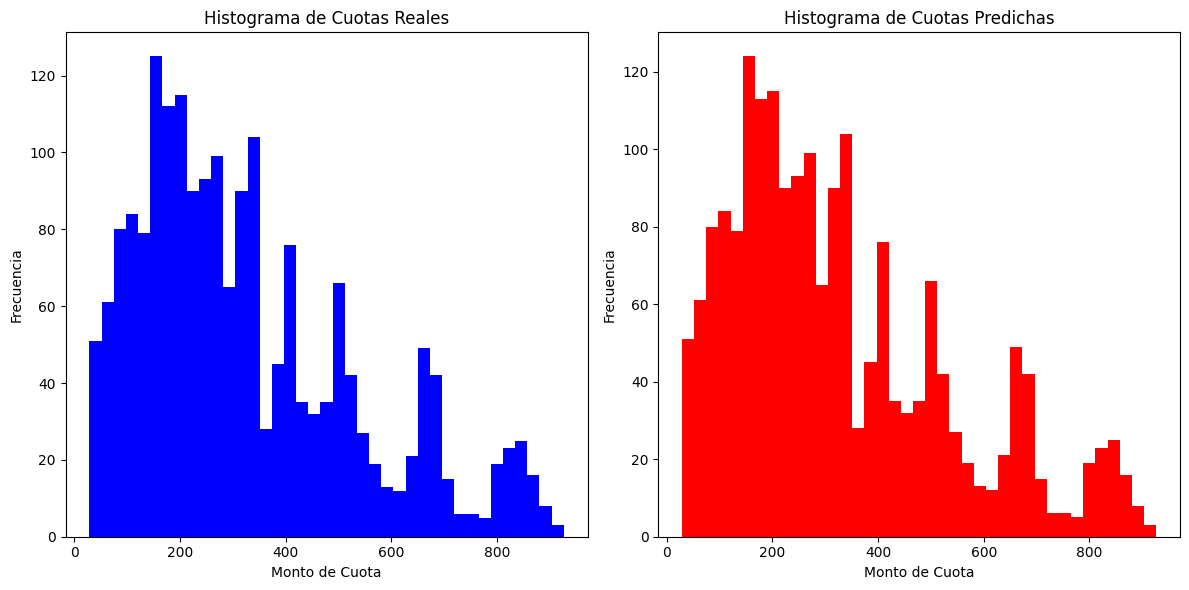

In [36]:
# Asumiendo que 'comparison_df' es tu DataFrame y tiene columnas 'Real Installment' y 'Predicted Installment'
real_data = comparison_df['Real Installment']
predicted_data = comparison_df['Predicted Installment']

# Configuración de los bins. Ajusta esto según sea necesario para tu análisis
bins = np.linspace(min(real_data.min(), predicted_data.min()), max(real_data.max(), predicted_data.max()), 40)

# Crear una figura y un arreglo de ejes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Histograma para datos reales
axs[0].hist(real_data, bins, color='blue')
axs[0].set_title('Histograma de Cuotas Reales')
axs[0].set_xlabel('Monto de Cuota')
axs[0].set_ylabel('Frecuencia')

# Histograma para datos predichos
axs[1].hist(predicted_data, bins, color='red')
axs[1].set_title('Histograma de Cuotas Predichas')
axs[1].set_xlabel('Monto de Cuota')
axs[1].set_ylabel('Frecuencia')

# Ajustar el layout para evitar superposición de elementos
fig.tight_layout()

# Mostrar el gráfico
plt.show()
